In [1]:
import pandas as pd

# Data Exploration

## Training set

In [2]:
# read file 
df_train = pd.read_csv('./dataset/train.csv')
df_train.head()

,tweet_id,sentiment
0,1213084822521950209,neutral
1,1213011490372038656,neutral
2,1213763702715043840,mixed
3,1213764224356421633,neutral
4,1212766574337150976,positive


<AxesSubplot:>

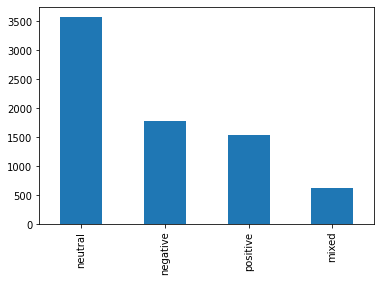

In [3]:
# count the number of neutral mixed and positive sentiments
df_train["sentiment"].value_counts().plot.bar()

## Testing set

In [4]:
# read file 
df_test = pd.read_csv('./dataset/test.csv')
df_test.head()

,tweet_id,sentiment
0,1213842050455654402,neutral
1,1215480766295171072,neutral
2,1222950264812064768,positive
3,1213967203076395009,negative
4,1213961696840171521,neutral


<AxesSubplot:>

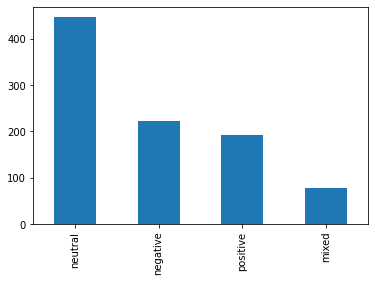

In [5]:
# count the number of neutral mixed and positive sentiments
df_test["sentiment"].value_counts().plot.bar()

## Dev/validation set

In [6]:
# read file 
df_dev = pd.read_csv('./dataset/dev.csv')
df_dev.head()

,tweet_id,sentiment
0,1214005466675777536,neutral
1,1213261378397409280,mixed
2,1213846984349626369,neutral
3,1216365312561635333,positive
4,1213234381768265728,neutral


<AxesSubplot:>

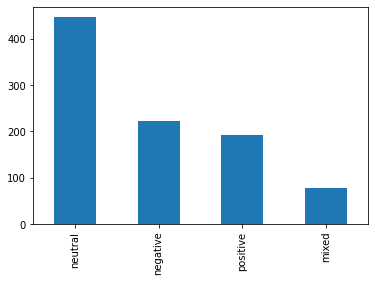

In [7]:
# count the number of neutral mixed and positive sentiments
df_dev["sentiment"].value_counts().plot.bar()

# Get summary for each csv file

In [8]:
df_train.describe()

,tweet_id
count,7.511000e+03
mean,1.211541e+18
std,5.158181e+15
min,1.200913e+18
25%,1.212290e+18
50%,1.212968e+18
75%,1.214013e+18
max,1.278426e+18


### The tweet_id is of type int64 and sentiment is type object

In [9]:
df_train.dtypes

tweet_id      int64
sentiment    object
dtype: object

In [10]:
#convert sentiment column to category type for label encoding
df_train["sentiment"] = df_train["sentiment"].astype('category')
df_train.dtypes

tweet_id        int64
sentiment    category
dtype: object

In [11]:
# use cat.code to encode each variable
df_train["sentiment_cat"] = df_train["sentiment"].cat.codes
df_train.head()

,tweet_id,sentiment,sentiment_cat
0,1213084822521950209,neutral,2
1,1213011490372038656,neutral,2
2,1213763702715043840,mixed,0
3,1213764224356421633,neutral,2
4,1212766574337150976,positive,3


In [12]:
#now do summary on the updated dataframe
df_train.describe()

,tweet_id,sentiment_cat
count,7.511000e+03,7511.000000
mean,1.211541e+18,1.801491
std,5.158181e+15,0.857102
min,1.200913e+18,0.000000
25%,1.212290e+18,1.000000
50%,1.212968e+18,2.000000
75%,1.214013e+18,2.000000
max,1.278426e+18,3.000000


## code to extract the tweets for each tweet id

In [14]:
len(df_test)

7511

In [16]:
#loop through each tweet id

# https://twitter.com/evan_greer/status/#tweet_id
# 1213084822521950209

# https://twitter.com/liyaSileshi/status/1212766574337150976
import urllib.request
contents = urllib.request.urlopen("https://twitter.com/liyaSileshi/status/1212766574337150976").read()
print(contents)
# for i in range(len(df_test)):
#     print(https://twitter.com/liyaSileshi/status/df_test["tweet_id"])

b'<!DOCTYPE html>\n<html dir="ltr" lang="en">\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" /><link rel="preconnect" href="//abs.twimg.com" /><link rel="dns-prefetch" href="//abs.twimg.com" /><link rel="preconnect" href="//api.twitter.com" /><link rel="dns-prefetch" href="//api.twitter.com" /><link rel="preconnect" href="//pbs.twimg.com" /><link rel="dns-prefetch" href="//pbs.twimg.com" /><link rel="preconnect" href="//t.co" /><link rel="dns-prefetch" href="//t.co" /><link rel="preconnect" href="//video.twimg.com" /><link rel="dns-prefetch" href="//video.twimg.com" /><link rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/polyfills.2e934f25.js" nonce="OGQ1ZmRkMzMtOTRmNS00OTQ4LWFkNzktOGZjNjdmZmQ5ZDdj" /><link rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/vendors~mai

In [23]:
import requests
import os
import json

# To set your enviornment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'

def auth():
#     return os.environ.get("BEARER_TOKEN")
    return "AAAAAAAAAAAAAAAAAAAAAJbROwEAAAAA%2F2lbWwmk2SyWxd0StFqPCzSw2zw%3Dd9G7bKpnpPoI5BzZ4iUDBfJXCy9l5eSERPUALPElvQRJK1LfFO"


def create_url():
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    ids = "ids=1213764224356421633,1255542774432063488"
    # You can adjust ids to include a single Tweets.
    # Or you can add to up to 100 comma-separated IDs
    url = "https://api.twitter.com/2/tweets?{}".format(ids)
    return url


def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers


def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


def main():
    bearer_token = auth()
    url = create_url()
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
    print(json.dumps(json_response, indent=4, sort_keys=True))


if __name__ == "__main__":
    main()

200
{
    "data": [
        {
            "id": "1213764224356421633",
            "text": "\u1265/\u1304 \u12a0\u1233\u121d\u1290\u12cd \u133d\u130c \u12a8\u121d\u12ad\u1275\u120d \u1320/\u121a \u12f0\u1218\u1240 \u130b\u122d \u1260\u1231\u12f3\u1295 \u1309\u1265\u129d\u1275 \u12a0\u120d\u1260\u123d\u122d \u12eb\u1209\u1275\u1295 \u1208\u1270\u1218\u1235\u1308\u1295 \u12a5\u1295\u12f0\u1290\u1308\u1228\u12cd....\n\n\u12a2\u1275\u12ee\u1335\u12eb \u1208\u12a5\u129b \u1325\u1229 \u130e\u1228\u1264\u1273\u127d\u1295 \u1293\u1275\u1364 \u12a8\u1205\u12c8\u1213\u1275 \u130b\u122d \u130d\u1295 \u1264\u1270\u1230\u1265 \u1290\u1295\u1362"
        },
        {
            "id": "1255542774432063488",
            "text": "During these unprecedented times, what\u2019s happening on Twitter can help the world better understand &amp; respond to the pandemic. \n\nWe're launching a free COVID-19 stream endpoint so qualified devs &amp; researchers can study the public conversation in real-time. https